In [1]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize

In [13]:
encoder = nn.Sequential(nn.Linear(1000,50), nn.ReLU(), nn.Linear(50,10))
decoder = nn.Sequential(nn.Linear(10,50), nn.ReLU(), nn.Linear(50,1000))
missing_model = LogisticMissingModel()

In [ ]:
model = notMIWAE(encoder, decoder, missing_model, 1024, 10, 1024, 10)

In [4]:
x = torch.randn(64, 1000)
x = normalize(x)

s = torch.randint(0, 2, (64, 1000)).float()

In [5]:
from src.datasets import generate_synthetic_dataset

data = generate_synthetic_dataset(N = 10, T = 1000, K = 20, clipping_model="soft", W = 50, thresh = .3)

In [6]:
data[0][0]

tensor([-0.5875,  0.4783,  0.0000, -0.2905,  0.0000, -0.0000, -0.0000, -0.3210,
         0.0000, -0.6287,  0.0000, -0.0000, -0.0000,  0.4721, -0.0000,  0.0000,
         0.0000,  0.0000, -0.3034,  0.0000,  0.0000, -0.0000,  0.3535,  0.0000,
         0.0000, -0.0000,  0.0000,  0.0000,  0.3018,  0.0000,  0.3509, -0.0000,
        -0.0000,  0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.3650,
        -0.0000, -0.0000,  0.4714, -0.4021,  0.0000, -0.2852, -0.0000, -0.6897,
        -0.0000, -0.0000, -0.0000,  0.7121, -0.3405,  0.0000, -0.0000, -0.3114,
        -0.0000,  0.0000, -0.0000, -0.7187,  0.0000, -0.0000,  0.3448,  0.4796,
         0.3904, -0.0000, -0.0000, -0.0000,  0.0000,  0.3576,  0.0000,  0.0000,
        -0.0000, -0.0000,  0.0000,  0.4303,  0.0000,  0.0000, -0.0000, -0.0000,
         0.4556, -0.0000,  0.3973, -0.0000, -0.3600, -0.0000,  0.0000,  0.0000,
        -0.0000,  0.0000, -0.5661,  0.3244,  0.0000, -0.3164, -0.0000, -0.3976,
        -0.5460, -0.3392,  0.7011, -0.00

In [1]:
from src.datasets import load_dataset
import torch

In [ ]:
dataset_dir = "/mnt/c/Users/atous/Documents/musicnet/musicnet/train_data"
n_samples = 10000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_train.pt")
torch.save(dataset.s,"s_train.pt")


In [ ]:
dataset_dir = "/mnt/c/Users/atous/Documents/musicnet/musicnet/test_data"
n_samples = 1000
window_size = 1024
dataset = load_dataset(dataset_dir, n_samples, window_size)
torch.save(dataset.x,"x_val.pt")
torch.save(dataset.s,"s_val.pt")


tensor([[-0.0113, -0.0164, -0.0106,  ...,  0.0091,  0.0279,  0.0165]])
tensor([[ 0.1830,  0.2311,  0.2058,  ..., -0.0747, -0.0828, -0.0304]])
tensor([[-0.2654, -0.4184, -0.4062,  ..., -0.7034, -0.7622, -0.3421]])
tensor([[ 0.1000,  0.1646,  0.1561,  ..., -0.0048,  0.0156,  0.0159]])
tensor([[-0.0176, -0.0352, -0.0450,  ...,  0.2086,  0.0017, -0.0483]])
tensor([[-0.0594, -0.0933, -0.0937,  ...,  0.2258,  0.2639,  0.1229]])
tensor([[ 0.0302,  0.0124, -0.0981,  ...,  0.0670,  0.0237,  0.0045]])
tensor([[ 0.0122, -0.0363, -0.0925,  ...,  0.0434,  0.0542,  0.0260]])
tensor([[-0.0580, -0.1015, -0.0989,  ..., -0.2052, -0.2411, -0.1126]])
tensor([[0.0372, 0.0575, 0.0484,  ..., 0.0497, 0.0590, 0.0280]])
tensor([[ 0.0389,  0.0777,  0.0787,  ..., -0.0115, -0.0228, -0.0116]])
tensor([[ 0.1435,  0.2088,  0.1397,  ..., -0.2915, -0.4569, -0.2480]])
tensor([[-0.0560, -0.0487, -0.0185,  ..., -0.1297,  0.0198, -0.0081]])
tensor([[ 0.2992,  0.4416,  0.3683,  ...,  0.0016, -0.0102,  0.0005]])
tensor([[ 0.

In [4]:
zero_mask = torch.eq(dataset.s, 0)

# Count the number of zeros
num_zeros = zero_mask.sum().item()

In [5]:
print(num_zeros)

533


In [7]:
import torchaudio
import matplotlib.pyplot as plt

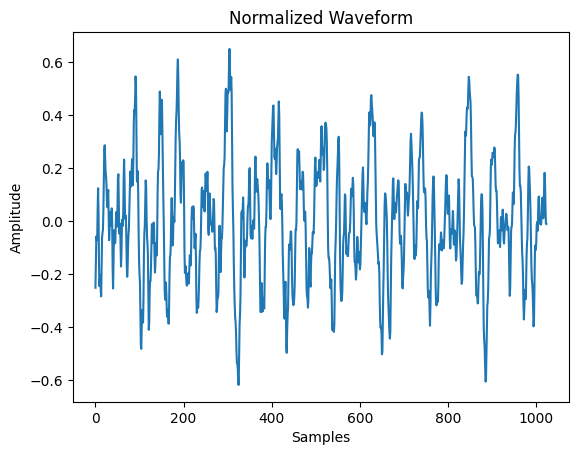

In [8]:


plt.plot(dataset.x[13].t().numpy())
plt.title("Normalized Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")


plt.show()


In [1]:
import torch
import torch.nn as nn

from src.models import notMIWAE, LogisticMissingModel
from src.utils import normalize
x_train = torch.load("x_train.pt")
s_train = torch.load("s_train.pt")
x_val = torch.load("x_val.pt")
s_val = torch.load("s_val.pt")


In [3]:
from src.datasets import ClippedDataset
device = torch.device("cuda:0")
train_dataset = ClippedDataset(x_train.to(device),s_train.to(device))
val_dataset = ClippedDataset(x_val.to(device),s_val.to(device))
from torch.utils.data import Dataset, DataLoader
from src.models import AudioDecoder,AudioEncoder,notMIWAE




train_loader = DataLoader(train_dataset,64)
val_loader = DataLoader(val_dataset,64)

encoder = AudioEncoder(1024,20).to(device)
decoder = AudioDecoder(1024,20,5).to(device)
encoder.to(device)
missing_model = LogisticMissingModel(fixed_params=True).to(device)
model = notMIWAE(encoder, decoder, missing_model,1024,20,1024,20,device)
model.to(device)
from src.train_test import *
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
train(model,optimizer,train_loader,val_loader,device,4,5,1)

Epoch 1/4: 100%|██████████| 157/157 [00:02<00:00, 56.98batch/s]


Training loss for epoch 0 is 15184.931485121417
Validation loss / Mean Squared Error for epoch 0 is 15212.872436523438/0.021046500653028488


Epoch 2/4: 100%|██████████| 157/157 [00:02<00:00, 60.88batch/s]


Training loss for epoch 1 is 15153.960564291401
Validation loss / Mean Squared Error for epoch 1 is 15209.783752441406/0.02100977674126625


Epoch 3/4:  48%|████▊     | 75/157 [00:01<00:01, 59.60batch/s]


KeyboardInterrupt: 